**Exp 5. Spam Email Detection: Build a spam email filter using text
classification algorithms and perform comparative analysis. (Naïve
Bayes, Logistic Regression, Support Vector Machine, Decision Tree,
Random Forest)**


Note: Use Evaluation Metrics (Accuracy, Precision, Recall,
F1-Score for binary classification), (ROC-AUC, Accuracy,
Precision, Recall, Weighted / Macro/ Micro Average F1-Score for
Multiclassification task) and Confusion Matrix.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,roc_auc_score


In [74]:
df=pd.read_csv('/content/drive/MyDrive/spam_email_500_samples.csv')
df.head()

,label,text
0,spam,Free entry in 2 million dollar contest. Click ...
1,spam,Act now! This offer is valid for today only.
2,spam,Get cheap medicines online without prescriptio...
3,ham,Lunch at 1 PM works for me.
4,ham,Thank you for your assistance.


In [75]:
df.shape
df.info()
df['label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   500 non-null    object
 1   text    500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


,count
label,
spam,250
ham,250


In [76]:
df['label']=df['label'].map({'ham':0,'spam':1})
df.head()


,label,text
0,1,Free entry in 2 million dollar contest. Click ...
1,1,Act now! This offer is valid for today only.
2,1,Get cheap medicines online without prescriptio...
3,0,Lunch at 1 PM works for me.
4,0,Thank you for your assistance.


In [77]:
X=df['text']
y=df['label']


In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [79]:
cv=CountVectorizer(stop_words='english')
X_train=cv.fit_transform(X_train)
X_test=cv.transform(X_test)
print("Training matrix shape:",X_train.shape)
print("Testing matrix shape:",X_test.shape)

Training matrix shape: (400, 83)
Testing matrix shape: (100, 83)


In [80]:
models={
    "Naive Bayes":MultinomialNB(),
    "Logistic Regression":LogisticRegression(max_iter=100),
    "SVM":SVC(probability=True),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier()
}



In [81]:
results=[]

for name,model in models.items():
    model.fit(X_train,y_train)
    pred=model.predict(X_test)

    acc=accuracy_score(y_test,pred)
    pre=precision_score(y_test,pred)
    rec=recall_score(y_test,pred)
    f1=f1_score(y_test,pred)

    results.append([name,acc,pre,rec,f1])

results_df=pd.DataFrame(results,columns=["Model","Accuracy","Precision","Recall","F1"])
results_df


,Model,Accuracy,Precision,Recall,F1
0,Naive Bayes,1.0,1.0,1.0,1.0
1,Logistic Regression,1.0,1.0,1.0,1.0
2,SVM,1.0,1.0,1.0,1.0
3,Decision Tree,1.0,1.0,1.0,1.0
4,Random Forest,1.0,1.0,1.0,1.0


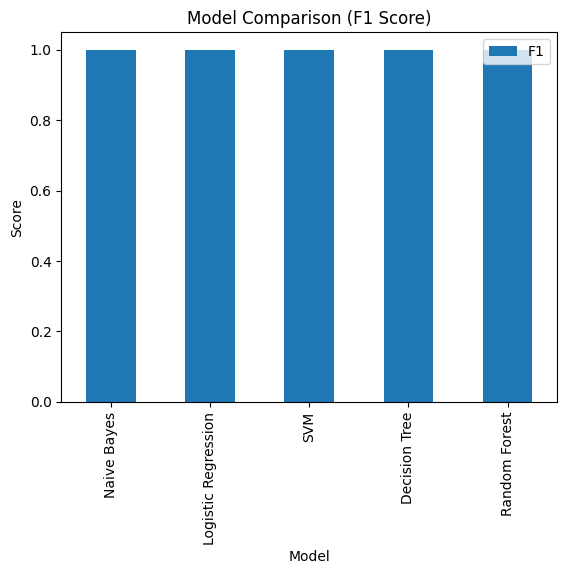

In [82]:
results_df.plot(x="Model",y="F1",kind="bar")
plt.title("Model Comparison (F1 Score)")
plt.ylabel("Score")
plt.show()


In [83]:
best_name=results_df.sort_values("F1",ascending=False).iloc[0,0]
best_model=models[best_name]

print("Best Model:",best_name)


Best Model: Naive Bayes


In [84]:
probs=best_model.predict_proba(X_test)[:,1]
print("ROC AUC:",roc_auc_score(y_test,probs))


ROC AUC: 1.0


In [85]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        51

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

